# Effect of fasting on sleep
We will import the following libraries


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now let's get the sleep data and check the first rows

In [44]:
sleep = pd.read_csv('data-fasting/sleep.csv')
display(sleep.nunique())
sleep.head()

Unnamed: 0                     71
awake                          54
bedtime_end                    71
bedtime_end_delta              70
bedtime_start                  71
bedtime_start_delta            71
breath_average                 11
deep                           65
duration                       54
efficiency                     18
hr_5min                        71
hr_average                     67
hr_lowest                       9
hypnogram_5min                 71
is_longest                      1
light                          65
midpoint_at_delta              71
midpoint_time                  59
onset_latency                  25
period_id                       2
rem                            55
restless                       16
rmssd                          29
rmssd_5min                     71
score                          24
score_alignment                38
score_deep                      5
score_disturbances             27
score_efficiency               18
score_latency 

,Unnamed: 0,awake,bedtime_end,bedtime_end_delta,bedtime_start,bedtime_start_delta,breath_average,deep,duration,efficiency,...,score_efficiency,score_latency,score_rem,score_total,summary_date,temperature_delta,temperature_deviation,temperature_trend_deviation,timezone,total
0,0,4710,2020-03-16T08:49:59+01:00,31799,2020-03-16T01:46:59+01:00,6419,14.375,5910,25380,81,...,76,70,25,59,2020-03-15,-0.17,-0.17,0.00,60,20670
1,1,6210,2020-03-17T09:34:33+01:00,34473,2020-03-17T00:31:33+01:00,1893,14.000,8160,32580,81,...,74,70,66,82,2020-03-16,-0.10,-0.10,-0.03,60,26370
2,2,5640,2020-03-18T09:41:33+01:00,34893,2020-03-18T00:58:33+01:00,3513,13.750,5940,31380,82,...,76,70,26,80,2020-03-17,0.02,0.02,0.00,60,25740
3,3,4170,2020-03-19T09:25:33+01:00,33933,2020-03-19T00:42:33+01:00,2553,13.750,8820,31380,87,...,88,89,36,86,2020-03-18,0.02,0.02,0.06,60,27210
4,4,5280,2020-03-20T08:42:30+01:00,31350,2020-03-20T00:12:30+01:00,750,14.000,8850,30600,83,...,79,67,22,78,2020-03-19,-0.08,-0.08,0.04,60,25320


## Impact of fasting on sleep and heart rate
Let's define our columns of interest in the data.

We want to see the impact of fasting on:
* **deep sleep**
* **rem sleep** (rapid eye movement sleep)
* **average resting heart rate** or the average RHR during sleep. Measured by averaging different measurements of heart rate during sleep.
* **heart rate variability** or HRV as measured by averaging over 5 minute periods during sleep (using a method called RMSSD)
We also want to check that the total amount of sleep was not affected, meaning that I did not sleep more during the fasting period.

So the only columns we are interested in above will be:
* `deep` this refers to the amount of deep sleep in seconds.
* `rem` this refers to the amount of rem sleep in seconds.
* `light` this refers to the amount of light sleep in seconds.
* `total` this refers to the total amount of sleep in seconds (includes deep, rem, light).
* `hr_average` (we will also check `hr_lowest`, which is the lowest resting heart-rate, just to be sure)
* `rmssd` this refers to the HRV measurement used by the Oura ring.


In [54]:
deep_lbl = 'deep'
rem_lbl = 'rem'
total_lbl = 'total'
light_lbl = 'light'
hr_lbl = 'hr_average'
hrv_lbl = 'rmssd'
date_lbl = 'summary_date'

**quick sanity check** 
First let's make sure that: 
* total is indeed what we think it is: the sum of deep, rem and light sleep

In [55]:
print("Sanity checks:")
print("- Warning: failed to verify 'total' sleep.") if any(sleep[total_lbl]-sleep[deep_lbl]-sleep[light_lbl]-sleep[rem_lbl]) else print("- Verified that the 'total' amount of sleep includes deep, rem and light sleep.")

Sanity checks:
- Verified that the 'total' amount of sleep includes deep, rem and light sleep.


### Indexing by Date
To make things easier we will index our dataframe by date.

First we will add a new `datetime` field based on the `summary_date`. Then we will set this field as an index to the dataframe.

In [59]:
datetime_lbl = 'datetime'
sleep[datetime_lbl] = pd.to_datetime(sleep[date_lbl], format='%Y-%m-%d')
sleep.set_index(datetime_lbl, inplace=True)

## Splitting the Fasting period from the rest
We will define the following two periods in the data:
* the baseline period before fasting period from the day **2020-03-24 to 2020-04-23**
* the fasting period from the day **2020-04-24 to 2020-05-23**

In [73]:
baseline = sleep['2020-03-22':'2020-04-23']
fasted = sleep['2020-04-24':'2020-05-23']

## Exploratory analysis
Let's start by visualizing the sleep

### Deep sleep

In [86]:
# Helper plotting function
def resize(a=15,b=5):
    plt.figure(figsize=(a, b), dpi= 80, facecolor='w', edgecolor='k')
def compare_barplot(metric, unit):
    resize()
    _ = plt.bar(baseline.index, baseline[metric], label='Baseline {}'.format(metric))
    _ = plt.bar(fasted.index, fasted[metric], label='Fasted {}'.format(metric))
    _ = plt.xlabel('date')
    _ = plt.ylabel('{} in {}'.format(metric, unit))
    _ = plt.xticks(rotation=45)
    _ = plt.legend()
    _ = plt.title('Comparing {} (in {}) between baseline and fasted periods'.format(metric, unit))
    plt.show()
    


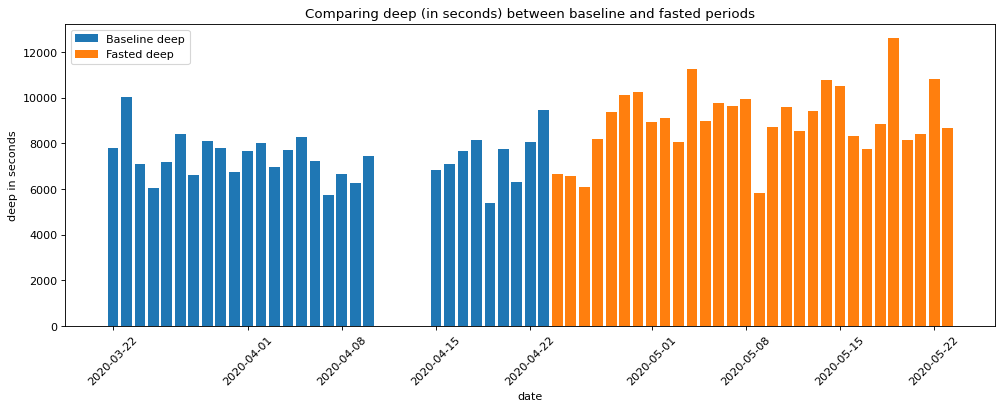

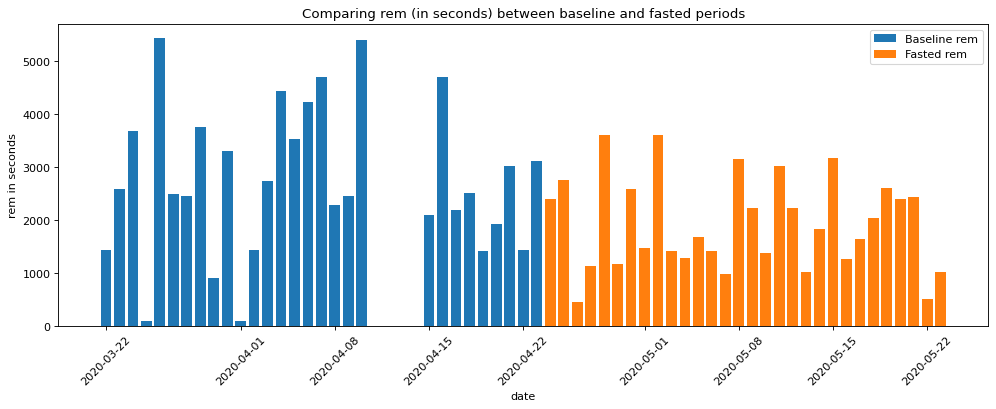

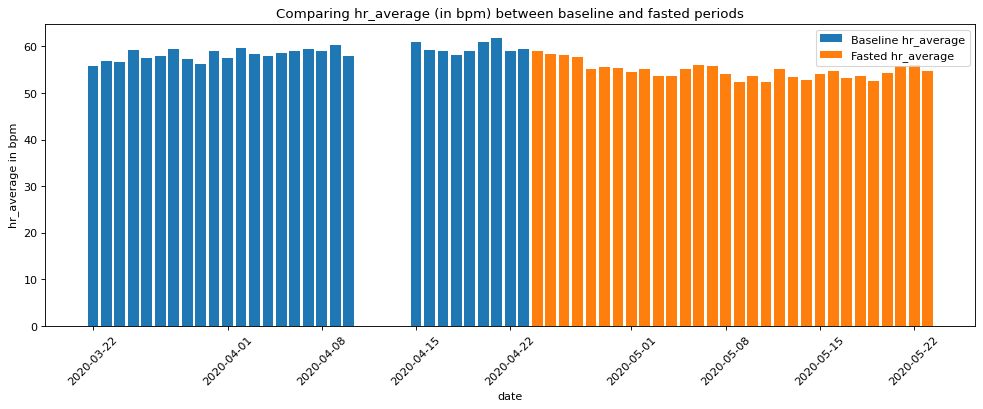

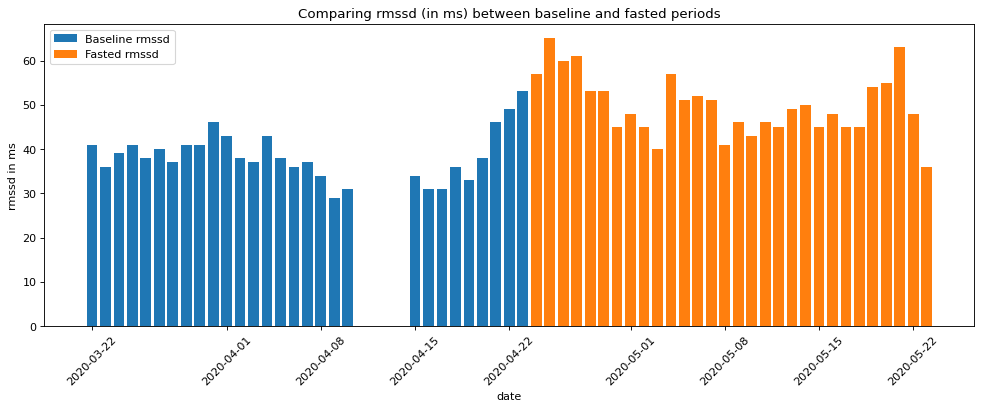

In [88]:
compare_barplot(deep_lbl, 'seconds')
compare_barplot(rem_lbl, 'seconds')
compare_barplot(hr_lbl, 'bpm')
compare_barplot(hrv_lbl, 'ms')

We can notice the following:
* the amount of deep sleep seems to have increased during the fast  
* the amount of rem sleep seems to have decreased during the fast  
* the average of resting heart rate (RHR or hr_average) seems to have decreased (improved) during the fast
* the heart rate variability (HRV or rmssd) seems to have increased (improved) during the fast. However, if we look closely at the HRV it seems like it is most likely due to a confounding time variation. In other words, we can see that starting the day '2020-04-21' it starts to go up and keeps growing while in the fast. So we should keep this in mind later.

In [115]:
# Let's define some helper functions
def get_empirical_cdf(data):
    """Returns the x,y values for a cumulative distribution function using an empirical method
    :param data: data as a numpy array
    :return: x,y
    """
    n = len(data)
    return np.sort(data), (np.arange(1, n+1) / n)

def get_numpy_arrays(metric):
    return np.array(baseline[metric]), np.array(fasted[metric])

def get_permuted(data1, data2):
    permuted_data = np.random.permutation(np.concatenate((data1, data2)))
    return permuted_data[:len(data1)], permuted_data[len(data1):]

def permute_and_draw_replicates(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = get_permuted(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def get_means_diff(data_1, data_2):
    fm=np.mean(data_1)
    return ( fm- np.mean(data_2))/fm


## Deep sleep

**Hypothesis:** The _mean of deep sleep_ is higher during the fast.

**Null hypothesis:** The _mean of deep sleep_ is not changed during the fast.

In [127]:
met = deep_lbl
unit='seconds'
b, f = get_numpy_arrays(met)

Let's compare the ECDFs from fasting and baseline

Text(0.5, 1.0, 'Comparing ECDFs for the metric: deep (in seconds)')

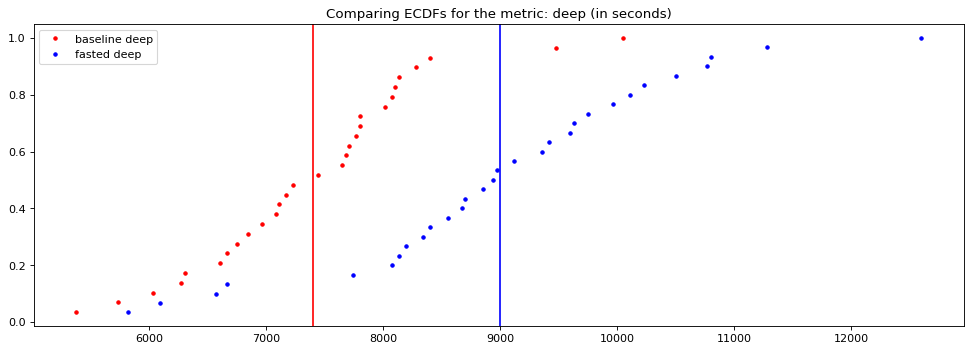

In [128]:
b_mean = b.mean()
f_mean = f.mean()
x, y = get_empirical_cdf(b)
resize()
plt.plot(x, y, color='red', marker='.', linestyle='none', label='baseline {}'.format(met))
plt.axvline(x=b_mean, color='red')
x, y = get_empirical_cdf(f)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasted {}'.format(met))
plt.axvline(x=f_mean, color='blue')
plt.legend()
plt.title('Comparing ECDFs for the metric: {} (in {})'.format(met, unit))

#### Hypothesis testing for the change in the mean deep sleep
We will draw the relative difference in means of different permutations.

First this difference in the original data is:

In [135]:
original = get_means_diff(f, b)
print("The mean {} (in {}) has changed by:\n {:.2%} \nduring the FASTED period".format(met, unit, original))

The mean deep (in seconds) has changed by:
 17.77% 
during the FASTED period


Let's draw replicates of the difference in means by performing multiple random permutations.

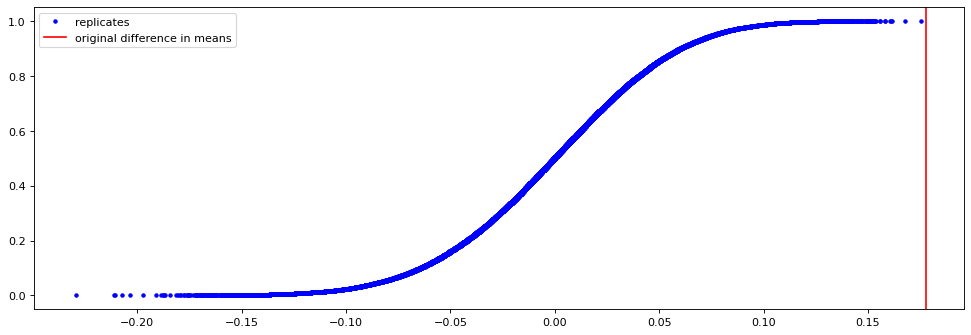

In [149]:
n_iterations = 100_000
reps = permute_and_draw_replicates(b, f, get_means_diff, size=n_iterations)
x, y = get_empirical_cdf(reps)
resize()
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=original, color='red', label='original difference in means')
plt.legend()

It seems like the difference in the means is not very likely to be due to chance.

Let's calculate the confidence intervals and the p-values for this difference:

In [150]:
ps = np.percentile(reps, [2.5, 97.5])
p_val = np.sum(reps >= original) / len(reps)
print("""
* 95% Confidence Interval range:
{:.2%}\t{:.2%}
* original value: {:.2%}

P-value: {:.10} ({:.0%})
""".format(ps[0], ps[1], original, p_val, p_val))


* 95% Confidence Interval range:
-9.88%	8.97%
* original value: 17.77%

P-value: 0.0 (0%)



But what if this is just because the **total** the sleep during the fasted period was just higher.

## Sanity checking with the Total amount of sleep

* Hypothesis: Mean amount of total sleep was not affected during the fast
* Null hypothesis: mean amount of total sleep was affected during the fast

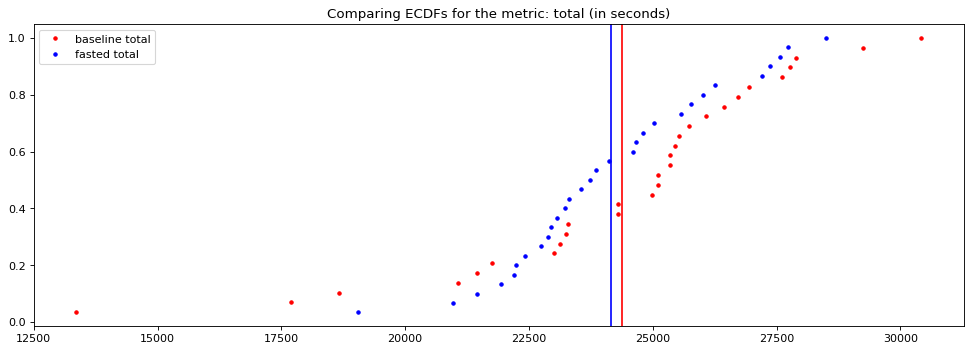

The mean total (in seconds) has changed by:
 -0.92% 
during the FASTED period


In [172]:
met = total_lbl
unit='seconds'
b, f = get_numpy_arrays(met)

b_mean = b.mean()
f_mean = f.mean()
x, y = get_empirical_cdf(b)
resize()
plt.plot(x, y, color='red', marker='.', linestyle='none', label='baseline {}'.format(met))
plt.axvline(x=b_mean, color='red')
x, y = get_empirical_cdf(f)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasted {}'.format(met))
plt.axvline(x=f_mean, color='blue')
plt.legend()
plt.title('Comparing ECDFs for the metric: {} (in {})'.format(met, unit))
plt.show()

original = get_means_diff(f, b)
print("The mean {} (in {}) has changed by:\n {:.2%} \nduring the FASTED period".format(met, unit, original))

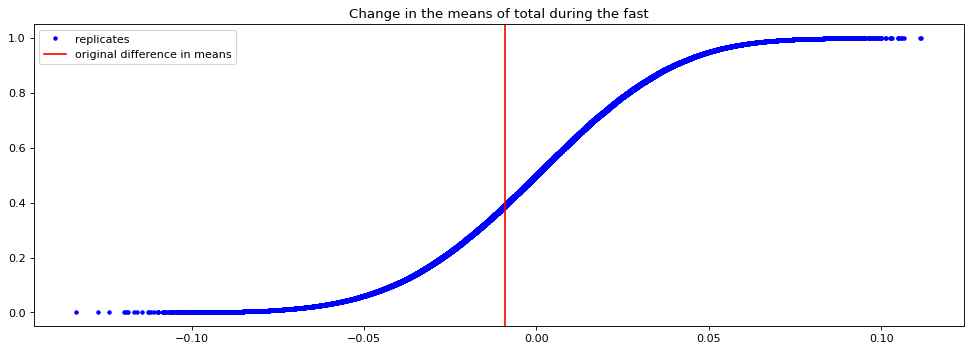

In [166]:
n_iterations = 100_000
reps = permute_and_draw_replicates(b, f, get_means_diff, size=n_iterations)
x, y = get_empirical_cdf(reps)
resize()
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=original, color='red', label='original difference in means')
plt.title('Change in the means of {} during the fast'.format(met))
plt.legend()
plt.show()

Needless to say, it seems like the change in the total amount of sleep is in the range of normal variance,

I'm not wasting time on p-values with this one :p 

## What about the REM sleep

The mean rem (in seconds) has changed by:
 -42.74% 
during the FASTED period


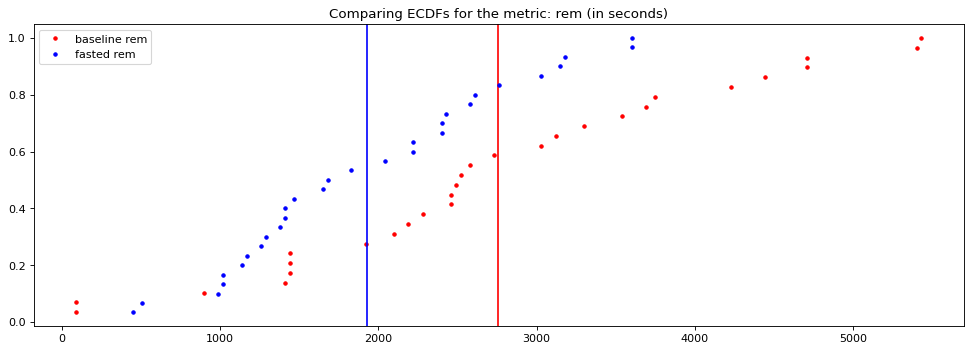

In [176]:
met = rem_lbl
unit='seconds'
b, f = get_numpy_arrays(met)


b_mean = b.mean()
f_mean = f.mean()
x, y = get_empirical_cdf(b)
resize()
plt.plot(x, y, color='red', marker='.', linestyle='none', label='baseline {}'.format(met))
plt.axvline(x=b_mean, color='red')
x, y = get_empirical_cdf(f)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasted {}'.format(met))
plt.axvline(x=f_mean, color='blue')
plt.legend()
plt.title('Comparing ECDFs for the metric: {} (in {})'.format(met, unit))

original = get_means_diff(f, b)
print("The mean {} (in {}) has changed by:\n {:.2%} \nduring the FASTED period".format(met, unit, original))

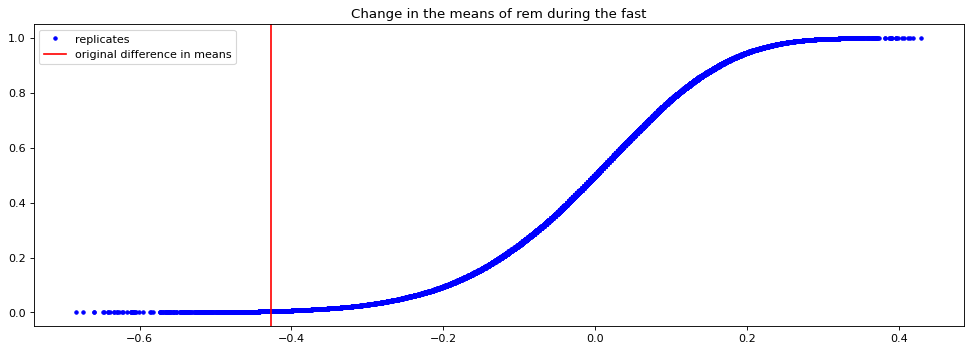


* 95% Confidence Interval range:
-31.02%	23.64%
* original value: -42.74%

P-value: 0.00464 (0%)



In [177]:
n_iterations = 100_000
reps = permute_and_draw_replicates(b, f, get_means_diff, size=n_iterations)
x, y = get_empirical_cdf(reps)
resize()
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=original, color='red', label='original difference in means')
plt.title('Change in the means of {} during the fast'.format(met))
plt.legend()
plt.show()

ps = np.percentile(reps, [2.5, 97.5])
p_val = np.sum(reps <= original) / len(reps)
print("""
* 95% Confidence Interval range:
{:.2%}\t{:.2%}
* original value: {:.2%}

P-value: {:.10} ({:.0%})
""".format(ps[0], ps[1], original, p_val, p_val))

It seems like the change in REM is not likely to be due to chance. 

The mean amount of REM sleep is likely to have decreased during the fast.

**NOTE** REM sleep usually happens at the end of the sleeping period, so sleeping less can have an effect on REM, but we just checked that the mean total of sleep does not seem to be affected.

/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The mean light (in seconds) has changed by:
 -7.52% 
during the FASTED period


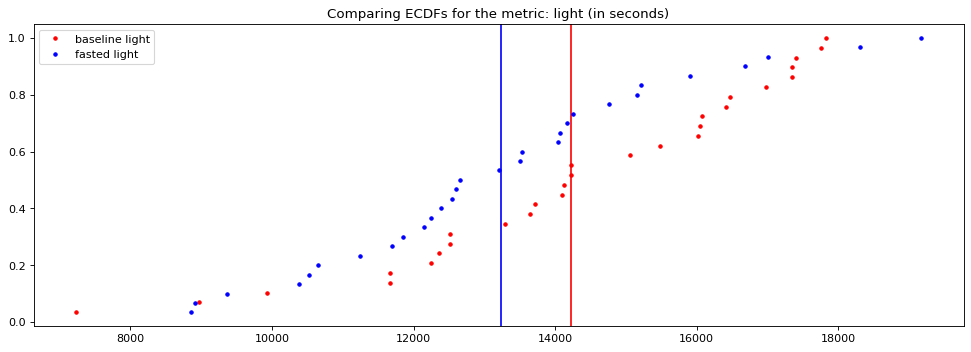

In [193]:
baseline['difff'] = baseline[rem_lbl] + baseline[light_lbl]
fasted['difff'] = fasted[rem_lbl] + fasted[light_lbl]
met = light_lbl
unit='seconds'
b, f = get_numpy_arrays(met)


b_mean = b.mean()
f_mean = f.mean()
x, y = get_empirical_cdf(b)
resize()
plt.plot(x, y, color='red', marker='.', linestyle='none', label='baseline {}'.format(met))
plt.axvline(x=b_mean, color='red')
x, y = get_empirical_cdf(f)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasted {}'.format(met))
plt.axvline(x=f_mean, color='blue')
plt.legend()
plt.title('Comparing ECDFs for the metric: {} (in {})'.format(met, unit))

original = get_means_diff(f, b)
print("The mean {} (in {}) has changed by:\n {:.2%} \nduring the FASTED period".format(met, unit, original))

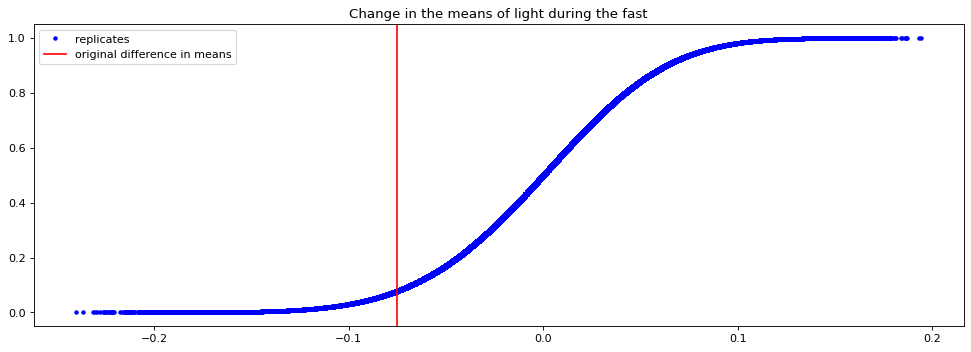


* 95% Confidence Interval range:
-10.48%	9.46%
* original value: -7.52%

P-value: 0.078013 (8%)



In [194]:
n_iterations = 10_000
reps = permute_and_draw_replicates(b, f, get_means_diff, size=n_iterations)
x, y = get_empirical_cdf(reps)
resize()
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=original, color='red', label='original difference in means')
plt.title('Change in the means of {} during the fast'.format(met))
plt.legend()
plt.show()

ps = np.percentile(reps, [2.5, 97.5])
p_val = np.sum(reps <= original) / len(reps)
print("""
* 95% Confidence Interval range:
{:.2%}\t{:.2%}
* original value: {:.2%}

P-value: {:.10} ({:.0%})
""".format(ps[0], ps[1], original, p_val, p_val))

# REM+Light vs deep

In [195]:
sleep['not_deep'] = sleep['light'] + sleep['rem']
sleep['not_deep_2']  = sleep['total'] - sleep['deep']

In [200]:
print('Verified Total is either deep or not.') if all(sleep['not_deep'] == sleep['not_deep_2']) else print('Warning!')

Verified Total is either deep or not.


In [203]:
baseline['not_deep'] = baseline['light'] + baseline['rem']
fasted['not_deep'] = fasted['light'] + fasted['rem']

/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<BarContainer object of 30 artists>

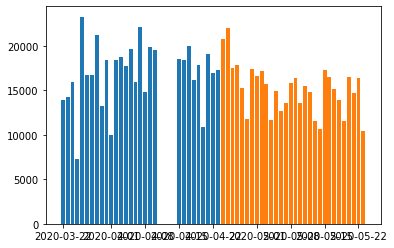

In [207]:
plt.bar(baseline.index, baseline['not_deep'])
plt.bar(fasted.index, fasted['not_deep'])

The mean not_deep (in seconds) has changed by:
 -12.00% 
during the FASTED period


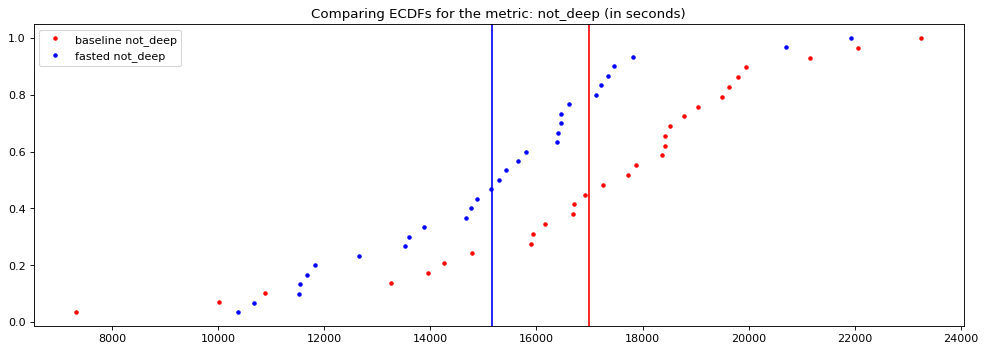

In [208]:
met = 'not_deep'
unit='seconds'
b, f = get_numpy_arrays(met)


b_mean = b.mean()
f_mean = f.mean()
x, y = get_empirical_cdf(b)
resize()
plt.plot(x, y, color='red', marker='.', linestyle='none', label='baseline {}'.format(met))
plt.axvline(x=b_mean, color='red')
x, y = get_empirical_cdf(f)
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasted {}'.format(met))
plt.axvline(x=f_mean, color='blue')
plt.legend()
plt.title('Comparing ECDFs for the metric: {} (in {})'.format(met, unit))

original = get_means_diff(f, b)
print("The mean {} (in {}) has changed by:\n {:.2%} \nduring the FASTED period".format(met, unit, original))

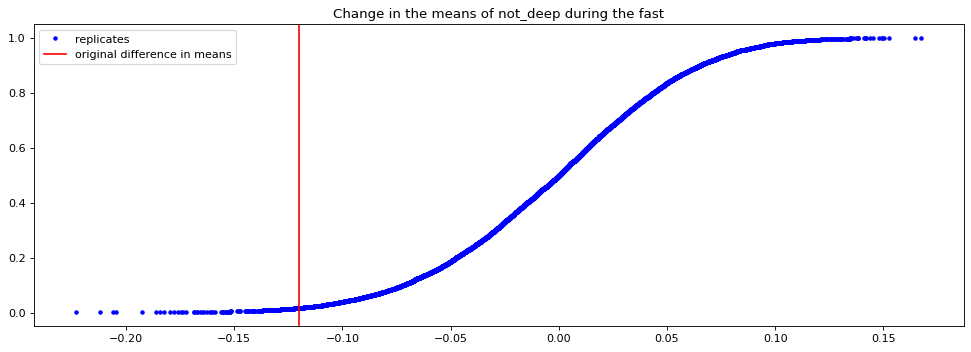


* 95% Confidence Interval range:
-10.97%	9.63%
* original value: -12.00%

P-value: 0.0167 (2%)



In [209]:
n_iterations = 10_000
reps = permute_and_draw_replicates(b, f, get_means_diff, size=n_iterations)
x, y = get_empirical_cdf(reps)
resize()
plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
plt.axvline(x=original, color='red', label='original difference in means')
plt.title('Change in the means of {} during the fast'.format(met))
plt.legend()
plt.show()

ps = np.percentile(reps, [2.5, 97.5])
p_val = np.sum(reps <= original) / len(reps)
print("""
* 95% Confidence Interval range:
{:.2%}\t{:.2%}
* original value: {:.2%}

P-value: {:.10} ({:.0%})
""".format(ps[0], ps[1], original, p_val, p_val))

In [210]:
sleep['not_rem'] = sleep['light'] + sleep['deep']
baseline['not_rem'] = baseline['light'] + baseline['deep']
fasted['not_rem'] = fasted['light'] + fasted['deep']

/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<BarContainer object of 30 artists>

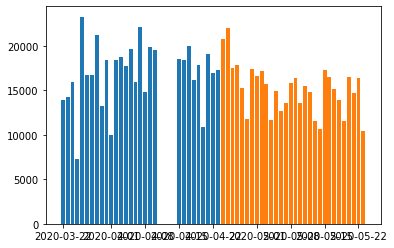

In [211]:
plt.bar(baseline.index, baseline['not_deep'])
plt.bar(fasted.index, fasted['not_deep'])

In [306]:
def scatter_compare(m1, m2):
    plt.scatter(baseline[m1], baseline[m2], label='Baseline')
    plt.scatter(fasted[m1], fasted[m2], label='Fasted', color='red')
    plt.xlabel(m1)
    plt.ylabel(m2)
    plt.title('Comparing {} Vs. {}'.format(m1, m2))
    plt.legend()
    plt.show()
    
def plot_compare_bar(m):
    plt.bar(baseline.index, baseline[m], label='Baseline')
    plt.bar(fasted.index, fasted[m], label='Fasted', color='red')
    plt.ylabel(m)
    plt.title('Comparing {} baseline and fasted'.format(m))
    plt.legend()
    plt.show()
    
def plot_compare(m):
    plt.plot(baseline.index, baseline[m], label='Baseline')
    plt.plot(fasted.index, fasted[m], label='Fasted', color='red')
    plt.ylabel(m)
    plt.title('Comparing {} baseline and fasted'.format(m))
    plt.legend()
    plt.show()

In [269]:
def plot_compare_ecdf(m, unit='sec'):
    b, f = get_numpy_arrays(m)


    b_mean = b.mean()
    f_mean = f.mean()
    x, y = get_empirical_cdf(b)
    plt.plot(x, y, color='red', marker='.', linestyle='none', label='baseline {}'.format(m))
    plt.axvline(x=b_mean, color='red')
    x, y = get_empirical_cdf(f)
    plt.plot(x, y, color='blue', marker='.', linestyle='none', label='fasted {}'.format(m))
    plt.axvline(x=f_mean, color='blue')
    plt.legend()
    plt.title('Comparing ECDFs for the metric: {} (in {})'.format(m, unit))
    plt.show()
    original = get_means_diff(f, b)
    print("The mean {} (in {}) has changed by:\n {:.2%} \nduring the FASTED period".format(met, unit, original))
    
def compare_with_signif(m , n_iterations=10_000):
    b, f = get_numpy_arrays(m)
    b_mean = b.mean()
    f_mean = f.mean()
    original = get_means_diff(f, b)
    reps = permute_and_draw_replicates(b, f, get_means_diff, size=n_iterations)
    x, y = get_empirical_cdf(reps)
    plt.plot(x, y, color='blue', marker='.', linestyle='none', label='replicates')
    plt.axvline(x=original, color='red', label='original difference in means')
    plt.title('Change in the means of {} during the fast'.format(m.capitalize()))
    plt.legend()
    plt.show()

    ps = np.percentile(reps, [2.5, 97.5])
    p_val = np.sum(reps <= original) / len(reps)
    print("""
    * 95% Confidence Interval range:
    {:.2%}\t{:.2%}
    * original value: {:.2%}

    P-value: {:.10} ({:.0%})
    """.format(ps[0], ps[1], original, p_val, p_val))

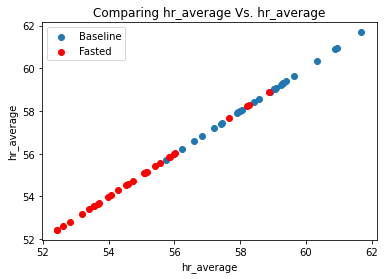

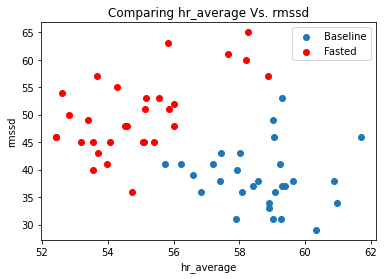

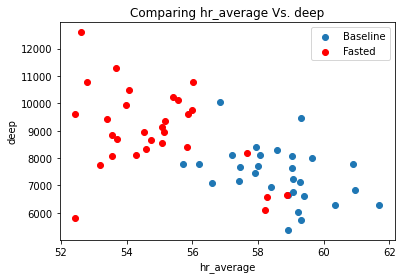

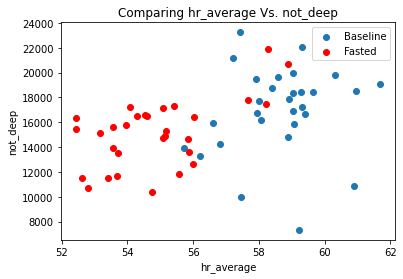

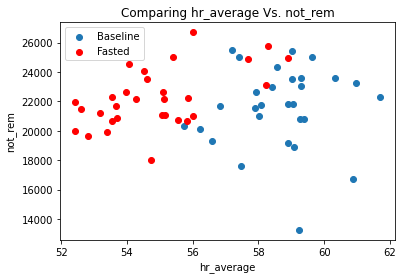

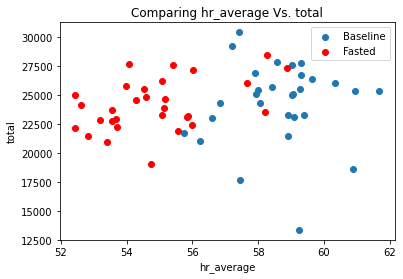

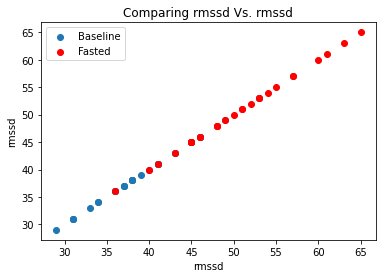

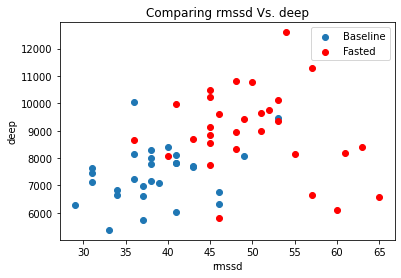

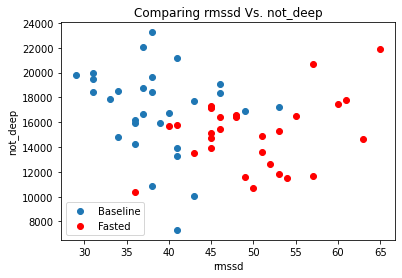

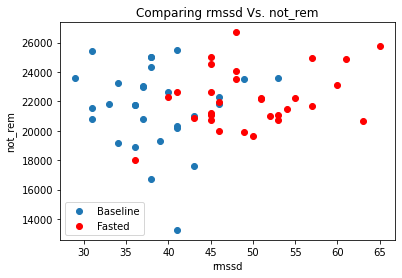

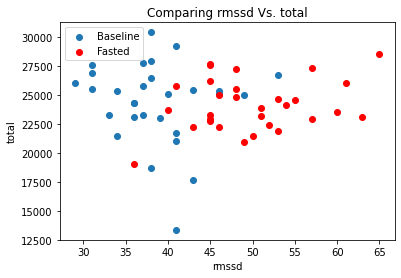

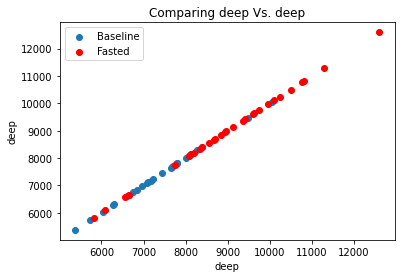

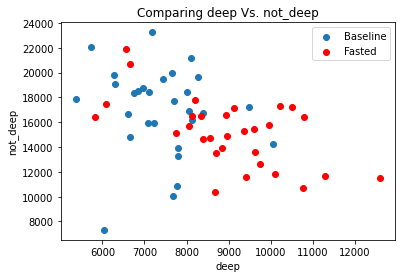

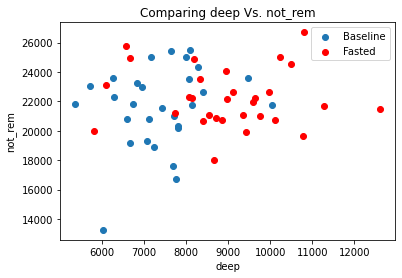

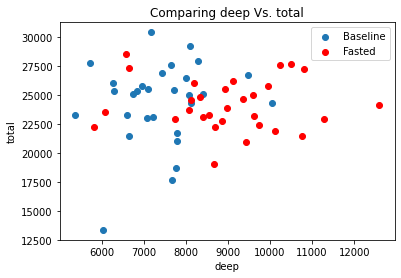

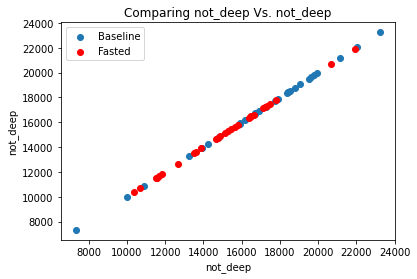

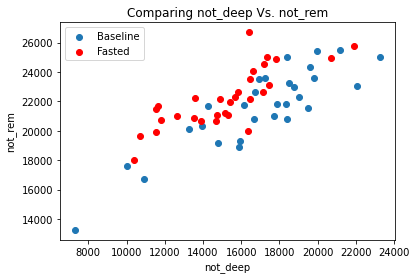

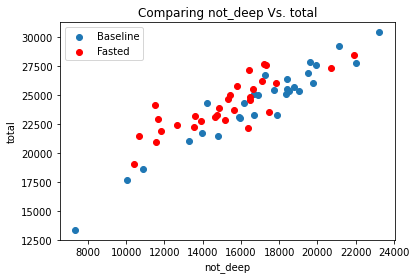

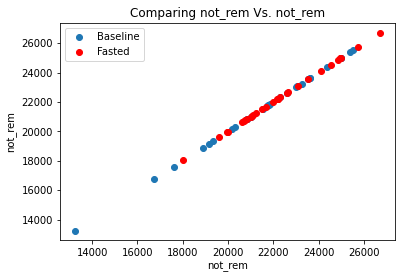

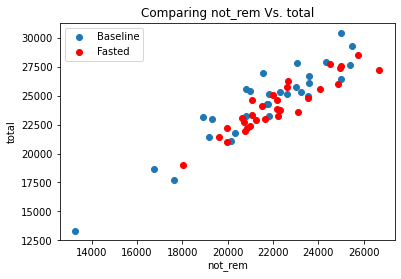

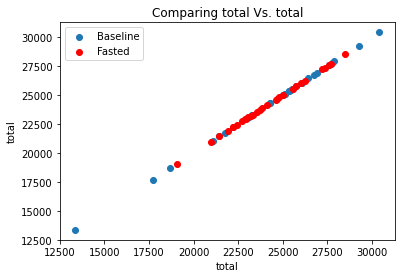

In [243]:
comparisons = ['hr_average', 'rmssd', 'deep', 'not_deep', 'not_rem', 'total']
for i in range(len(comparisons)):
    for c in comparisons[i:]:
        scatter_compare(comparisons[i],c)

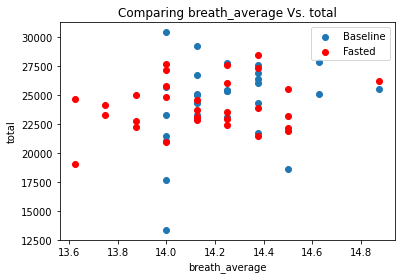

In [245]:
scatter_compare('breath_average', 'total')

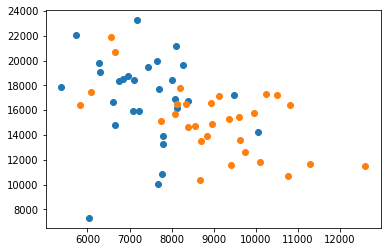

In [219]:
plt.scatter(baseline['deep'], baseline['not_deep'], label='baseline')
plt.scatter(fasted['deep'], fasted['not_deep'])

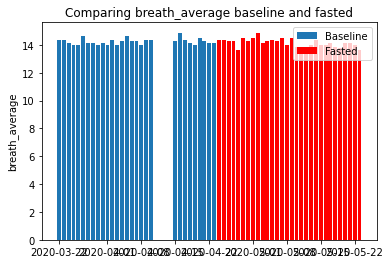

In [249]:
plot_compare('breath_average')

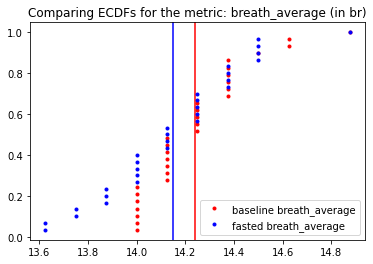

The mean not_deep (in br) has changed by:
 -0.65% 
during the FASTED period


In [258]:
plot_compare_ecdf('breath_average', 'br')

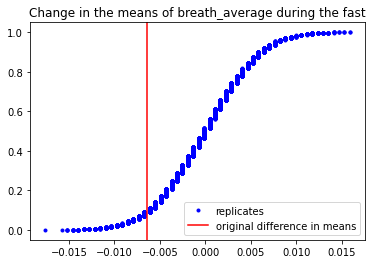


    * 95% Confidence Interval range:
    -0.91%	0.94%
    * original value: -0.65%

    P-value: 0.0899 (9%)
    


In [261]:
compare_with_signif('breath_average')

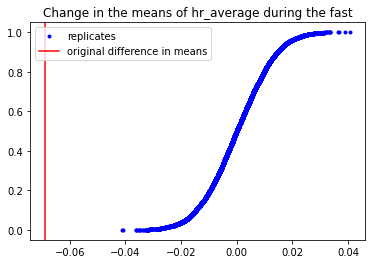


    * 95% Confidence Interval range:
    -2.22%	2.24%
    * original value: -6.88%

    P-value: 0.0 (0%)
    


In [262]:
compare_with_signif(hr_lbl)

In [275]:
sleep.dtypes

Unnamed: 0                       int64
awake                            int64
bedtime_end                     object
bedtime_end_delta                int64
bedtime_start                   object
bedtime_start_delta              int64
breath_average                 float64
deep                             int64
duration                         int64
efficiency                       int64
hr_5min                         object
hr_average                     float64
hr_lowest                        int64
hypnogram_5min                  object
is_longest                       int64
light                            int64
midpoint_at_delta                int64
midpoint_time                    int64
onset_latency                    int64
period_id                        int64
rem                              int64
restless                         int64
rmssd                            int64
rmssd_5min                      object
score                            int64
score_alignment          

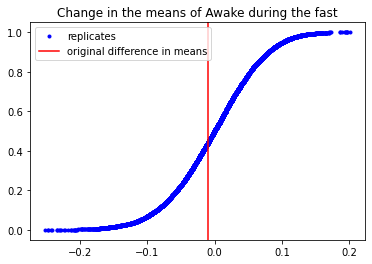


    * 95% Confidence Interval range:
    -13.50%	11.87%
    * original value: -1.05%

    P-value: 0.4389 (44%)
    
float64
float64
float64


/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


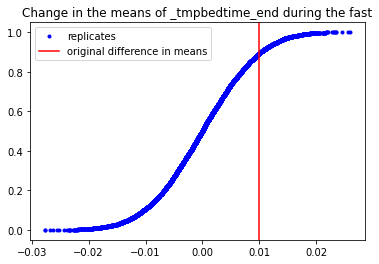


    * 95% Confidence Interval range:
    -1.54%	1.53%
    * original value: 1.00%

    P-value: 0.8926 (89%)
    


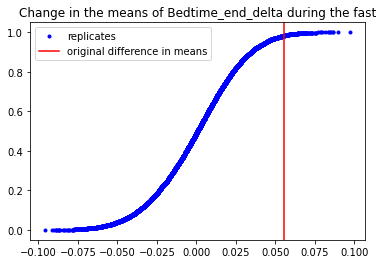


    * 95% Confidence Interval range:
    -5.55%	5.23%
    * original value: 5.53%

    P-value: 0.9833 (98%)
    
float64
float64
float64


/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


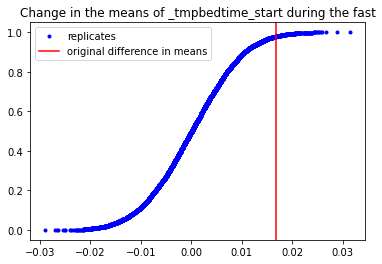


    * 95% Confidence Interval range:
    -1.61%	1.62%
    * original value: 1.68%

    P-value: 0.9787 (98%)
    


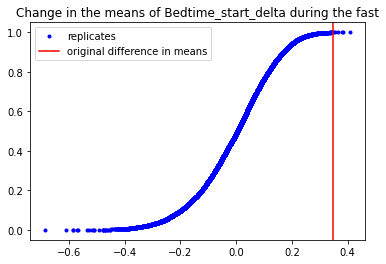


    * 95% Confidence Interval range:
    -30.91%	23.98%
    * original value: 34.61%

    P-value: 0.9993 (100%)
    


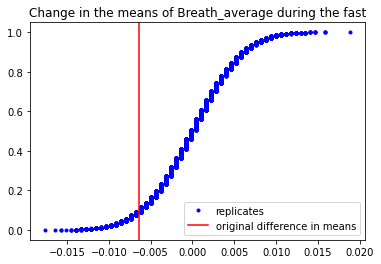


    * 95% Confidence Interval range:
    -0.91%	0.94%
    * original value: -0.65%

    P-value: 0.092 (9%)
    


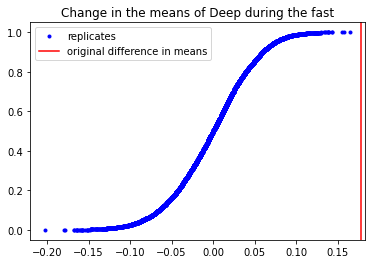


    * 95% Confidence Interval range:
    -9.99%	8.79%
    * original value: 17.77%

    P-value: 1.0 (100%)
    


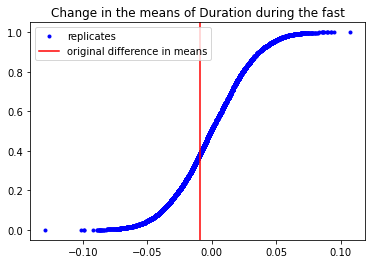


    * 95% Confidence Interval range:
    -5.72%	5.52%
    * original value: -0.94%

    P-value: 0.3791 (38%)
    


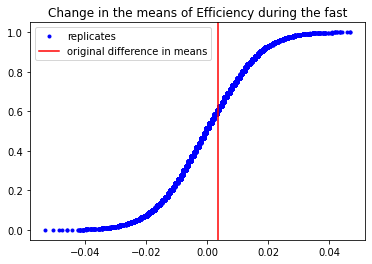


    * 95% Confidence Interval range:
    -2.75%	2.72%
    * original value: 0.35%

    P-value: 0.6056 (61%)
    
>>>>>>    Skipping hr_5min... err: Unknown string format: [0, 62, 62, 61, 61, 60, 60, 59, 59, 59, 59, 59, 59, 58, 61, 62, 63, 64, 62, 62, 62, 62, 60, 58, 58, 60, 62, 59, 58, 58, 59, 60, 60, 60, 59, 60, 62, 67, 61, 58, 59, 60, 59, 60, 58, 58, 57, 57, 58, 56, 56, 57, 57, 57, 57, 57, 57, 57, 56, 58, 57, 62, 0, 0, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 55, 56, 59, 67, 60, 63, 65, 59, 57, 59, 57, 57, 58, 58, 58, 58, 57, 56, 59, 58, 58, 61, 59, 57, 59, 59, 59, 59, 56, 56, 57, 58, 58, 59, 59, 58, 60, 60, 59, 65]
>>>>>>    Skipping hr_5min... err: da


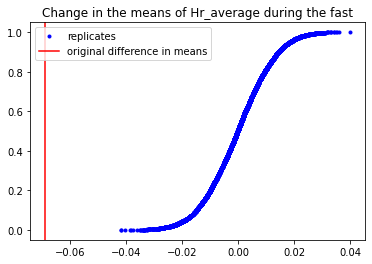


    * 95% Confidence Interval range:
    -2.25%	2.19%
    * original value: -6.88%

    P-value: 0.0 (0%)
    


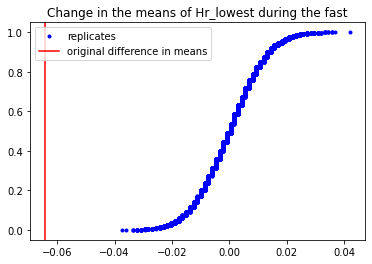


    * 95% Confidence Interval range:
    -2.16%	2.09%
    * original value: -6.42%

    P-value: 0.0 (0%)
    
>>>>>>    Skipping hypnogram_5min... err: Python int too large to convert to C long
>>>>>>    Skipping hypnogram_5min... err: da


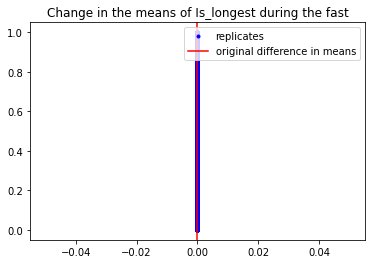


    * 95% Confidence Interval range:
    0.00%	0.00%
    * original value: 0.00%

    P-value: 1.0 (100%)
    


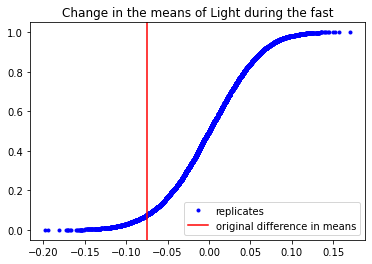


    * 95% Confidence Interval range:
    -10.39%	9.41%
    * original value: -7.52%

    P-value: 0.0751 (8%)
    


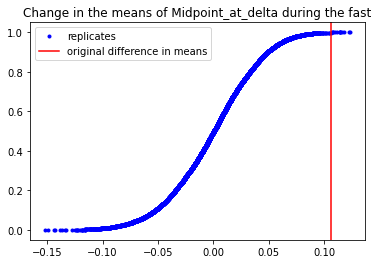


    * 95% Confidence Interval range:
    -8.10%	7.26%
    * original value: 10.60%

    P-value: 0.9986 (100%)
    


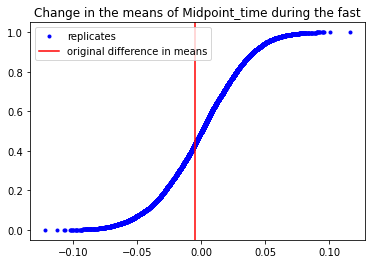


    * 95% Confidence Interval range:
    -6.60%	6.08%
    * original value: -0.45%

    P-value: 0.4378 (44%)
    


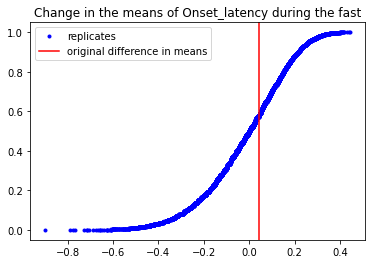


    * 95% Confidence Interval range:
    -42.90%	30.09%
    * original value: 4.34%

    P-value: 0.5839 (58%)
    


/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


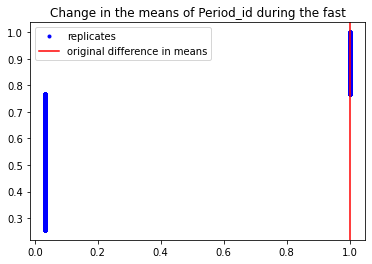


    * 95% Confidence Interval range:
    -inf%	100.00%
    * original value: 100.00%

    P-value: 1.0 (100%)
    


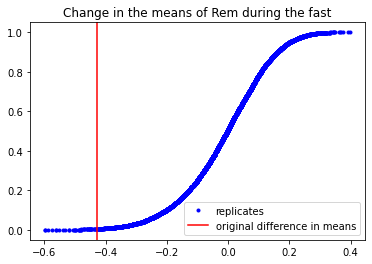


    * 95% Confidence Interval range:
    -31.72%	23.71%
    * original value: -42.74%

    P-value: 0.0047 (0%)
    


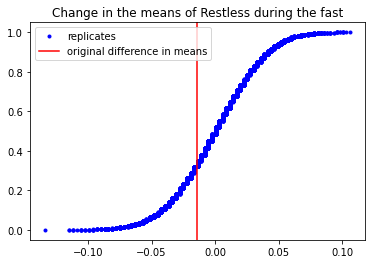


    * 95% Confidence Interval range:
    -6.59%	6.25%
    * original value: -1.45%

    P-value: 0.3208 (32%)
    


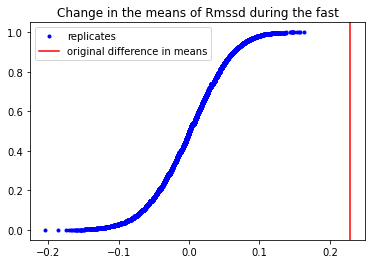


    * 95% Confidence Interval range:
    -10.28%	9.35%
    * original value: 22.81%

    P-value: 1.0 (100%)
    
>>>>>>    Skipping rmssd_5min... err: Unknown string format: [0, 32, 40, 43, 47, 42, 57, 43, 44, 51, 47, 58, 55, 51, 48, 48, 36, 44, 50, 54, 61, 58, 60, 60, 53, 59, 70, 53, 57, 59, 67, 69, 75, 80, 72, 49, 48, 29, 38, 54, 58, 48, 45, 54, 47, 52, 53, 61, 71, 65, 58, 64, 60, 65, 68, 79, 79, 76, 91, 57, 44, 49, 0, 0, 31, 30, 48, 43, 41, 43, 60, 59, 57, 63, 73, 66, 64, 29, 52, 41, 40, 61, 80, 49, 52, 62, 66, 53, 60, 64, 59, 49, 56, 59, 53, 67, 70, 57, 54, 50, 52, 48, 59, 58, 63, 61, 58, 54, 61, 67, 63, 52, 60, 58]
>>>>>>    Skipping rmssd_5min... err: da


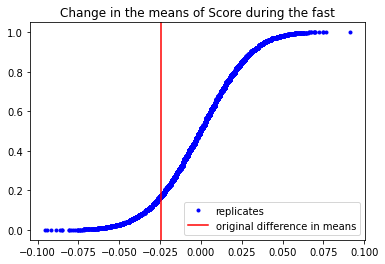


    * 95% Confidence Interval range:
    -5.07%	4.67%
    * original value: -2.44%

    P-value: 0.1711 (17%)
    


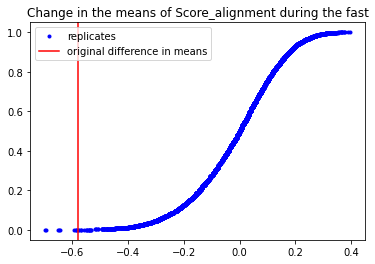


    * 95% Confidence Interval range:
    -34.96%	25.81%
    * original value: -57.91%

    P-value: 0.0008 (0%)
    


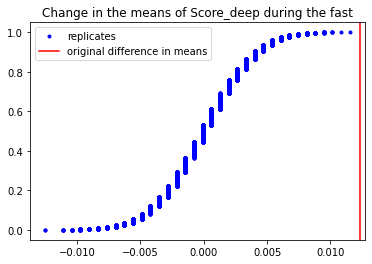


    * 95% Confidence Interval range:
    -0.63%	0.68%
    * original value: 1.24%

    P-value: 1.0 (100%)
    


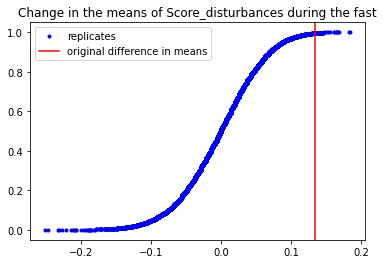


    * 95% Confidence Interval range:
    -11.80%	10.48%
    * original value: 13.38%

    P-value: 0.9948 (99%)
    


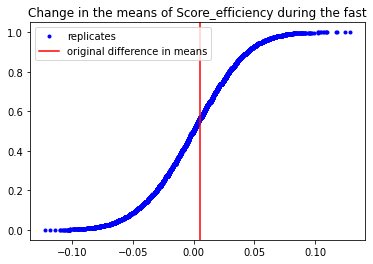


    * 95% Confidence Interval range:
    -7.09%	6.63%
    * original value: 0.54%

    P-value: 0.5601 (56%)
    


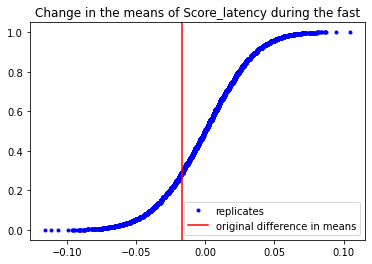


    * 95% Confidence Interval range:
    -6.03%	5.53%
    * original value: -1.65%

    P-value: 0.29 (29%)
    


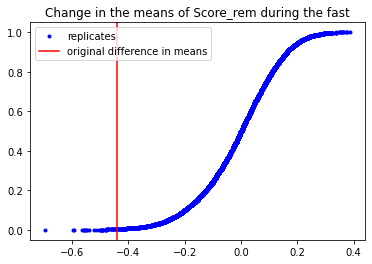


    * 95% Confidence Interval range:
    -31.12%	24.04%
    * original value: -44.03%

    P-value: 0.0041 (0%)
    


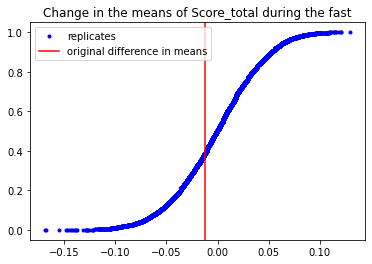


    * 95% Confidence Interval range:
    -8.52%	7.81%
    * original value: -1.23%

    P-value: 0.3913 (39%)
    
float64
float64
float64


/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


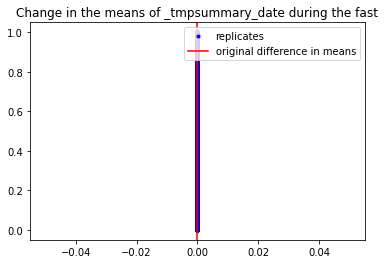


    * 95% Confidence Interval range:
    0.00%	0.00%
    * original value: 0.00%

    P-value: 1.0 (100%)
    


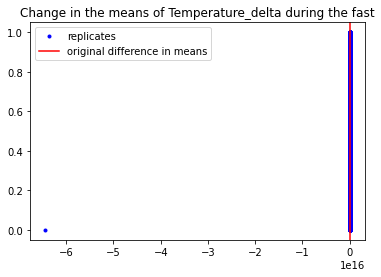


    * 95% Confidence Interval range:
    -345.25%	77.44%
    * original value: 28.67%

    P-value: 0.6952 (70%)
    


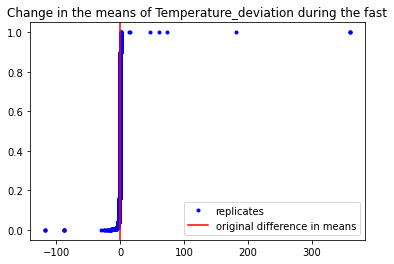


    * 95% Confidence Interval range:
    -321.88%	77.05%
    * original value: 28.67%

    P-value: 0.6962 (70%)
    


/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


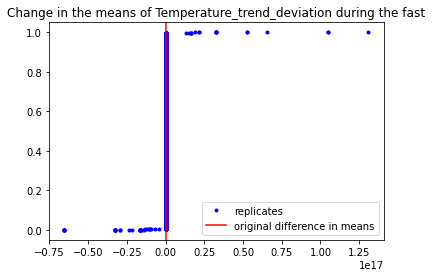


    * 95% Confidence Interval range:
    -1620.67%	2014.00%
    * original value: 142.29%

    P-value: 0.8535 (85%)
    


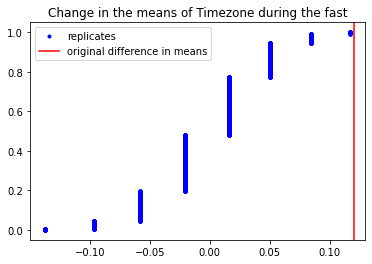


    * 95% Confidence Interval range:
    -9.68%	8.42%
    * original value: 12.07%

    P-value: 1.0 (100%)
    


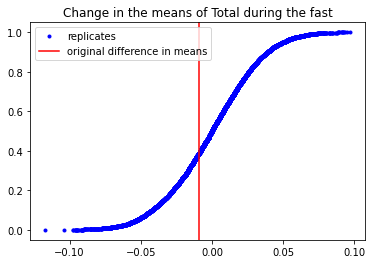


    * 95% Confidence Interval range:
    -6.20%	5.90%
    * original value: -0.92%

    P-value: 0.3888 (39%)
    


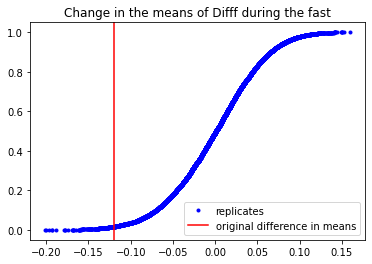


    * 95% Confidence Interval range:
    -11.00%	9.78%
    * original value: -12.00%

    P-value: 0.0157 (2%)
    


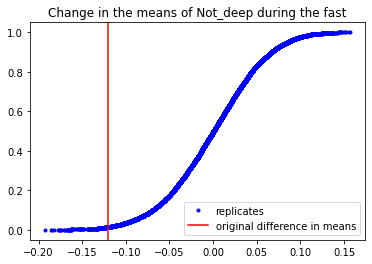


    * 95% Confidence Interval range:
    -10.76%	9.93%
    * original value: -12.00%

    P-value: 0.0154 (2%)
    
>>>>>>    Skipping not_deep_2... err: yo


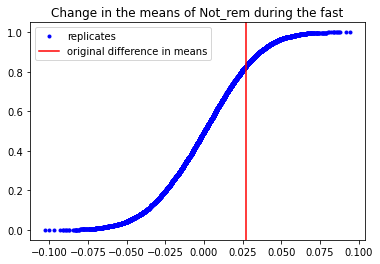


    * 95% Confidence Interval range:
    -5.66%	5.38%
    * original value: 2.71%

    P-value: 0.8293 (83%)
    


/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars


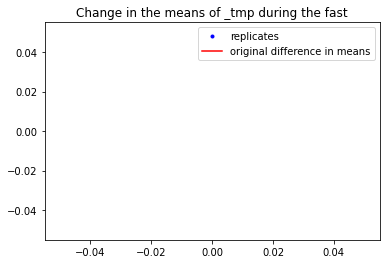

/Users/ismail/RestInGit/nofone/venv/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal



    * 95% Confidence Interval range:
    nan%	nan%
    * original value: nan%

    P-value: 0.0 (0%)
    


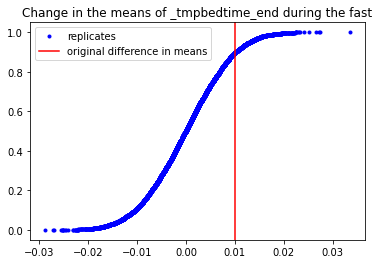


    * 95% Confidence Interval range:
    -1.57%	1.52%
    * original value: 1.00%

    P-value: 0.8946 (89%)
    


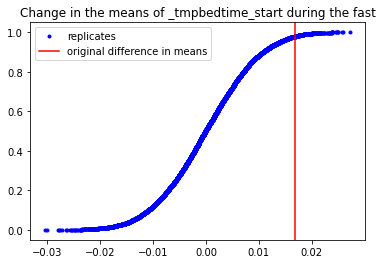


    * 95% Confidence Interval range:
    -1.64%	1.63%
    * original value: 1.68%

    P-value: 0.9786 (98%)
    


In [341]:
for x in sleep.columns[1:]:
    if sleep.dtypes[x] == object:
        try:
            for el in [fasted, baseline, sleep]:
                el['_tmp'+x]=pd.to_datetime(el[x], utc=True)
                el['_tmp'+x]=el['_tmp'+x].dt.hour+el['_tmp'+x].dt.minute/60
                el['_tmp'+x]=el['_tmp'+x].map(lambda x : x+24 if x<12 else x) 
                print(el.dtypes['_tmp'+x])
        except Exception as e:
            print('>>>>>>    Skipping {}... err: {}'.format(x, e))
            
        try:
            compare_with_signif('_tmp'+x)
        except:
            print('>>>>>>    Skipping {}... err: {}'.format(x, 'da'))

    else:
        try:
            compare_with_signif(x)
        except:
            print('>>>>>>    Skipping {}... err: {}'.format(x, 'yo'))

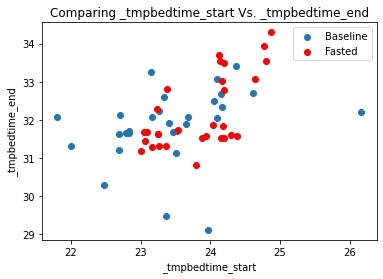

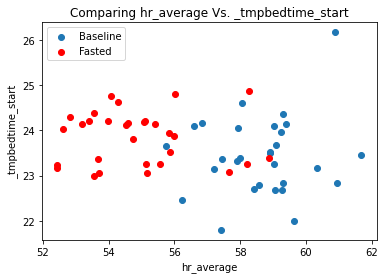

In [327]:
scatter_compare('_tmp'+'bedtime_start', '_tmp'+'bedtime_end')
scatter_compare('hr_average', '_tmp'+'bedtime_start')


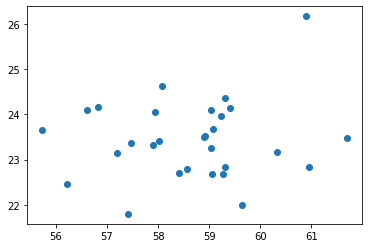

In [337]:
plt.scatter(baseline['hr_average'], baseline['_tmpbedtime_start'])

In [350]:
def general_scatter(m, n):
    plt.scatter(sleep[m], sleep[n])
    plt.show()

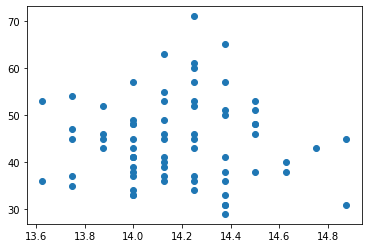

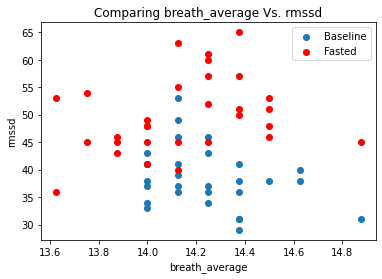

In [351]:
general_scatter(breath_lbl, 'rmssd')
scatter_compare(breath_lbl, 'rmssd')